In [1]:
import sys
import os
path = os.path.abspath(os.path.join('..','..'))
sys.path.append(path)

import numpy as np
from datetime import date, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from reservoirpy.wellproductivitypy import decline as dc


# Declination Object

Create a declination Object by setting the parameters

In [2]:
qi = 680 #bbl/d
di = 0.28 #Annual declination in fraction
ti = date(2020,5,1) #Time for initial flow
b = 0

c = dc.declination(qi=qi,di=di,ti=ti)
print(c)

Exponential Declination 
 Ti: 2020-05-01 
 Qi: 680 bbl/d 
 Rate: 0.28 Annually 
 b: 0


In [3]:
fr,np = c.forecast(date(2020,2,1),date(2025,12,31),fq='1d')
print(fr)
print('Cummulative production is: ', np)

              rate        cum
time                         
2020-02-01  728.61     728.61
2020-02-02  728.05    1456.65
2020-02-03  727.49    2184.14
2020-02-04  726.93    2911.08
2020-02-05  726.37    3637.45
...            ...        ...
2025-12-27  139.38  768530.75
2025-12-28  139.27  768670.03
2025-12-29  139.17  768809.20
2025-12-30  139.06  768948.26
2025-12-31  138.95  769087.21

[2161 rows x 2 columns]
Cummulative production is:  769087.21


In [4]:
c.forecast()

(              rate        cum
 time                         
 2020-05-31  664.53     664.53
 2020-06-30  649.41   20146.85
 2020-07-31  634.15   39805.48
 2020-08-31  619.25   59002.13
 2020-09-30  605.16   77156.88
 2020-10-31  590.94   95475.92
 2020-11-30  577.49  112800.70
 2020-12-31  563.92  130282.26
 2021-01-31  550.67  147353.00
 2021-02-28  538.97  162444.08
 2021-03-31  526.30  178759.41
 2021-04-30  514.33  194189.23,
 194189.23)

In [5]:
fr, np = c.forecast(econ_limit=300, fq='1m')
print(fr)
print('Cummulative ',np)

              rate        cum
time                         
2020-05-31  664.53     664.53
2020-06-30  649.41   20146.85
2020-07-31  634.15   39805.48
2020-08-31  619.25   59002.13
2020-09-30  605.16   77156.88
2020-10-31  590.94   95475.92
2020-11-30  577.49  112800.70
2020-12-31  563.92  130282.26
2021-01-31  550.67  147353.00
2021-02-28  538.97  162444.08
2021-03-31  526.30  178759.41
2021-04-30  514.33  194189.23
2021-05-31  502.24  209758.69
2021-06-30  490.81  224483.11
2021-07-31  479.28  239340.79
2021-08-31  468.02  253849.30
2021-09-30  457.37  267570.36
2021-10-31  446.62  281415.60
2021-11-30  436.46  294509.38
2021-12-31  426.20  307721.66
2022-01-31  416.19  320623.45
2022-02-28  407.34  332029.04
2022-03-31  397.77  344359.91
2022-04-30  388.72  356021.51
2022-05-31  379.59  367788.66
2022-06-30  370.95  378917.13
2022-07-31  362.23  390146.32
2022-08-31  353.72  401111.62
2022-09-30  345.67  411481.78
2022-10-31  337.55  421945.78
2022-11-30  329.87  431841.85
2022-12-31

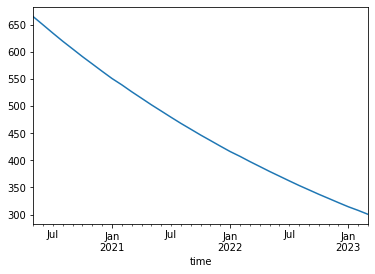

In [6]:
fr['rate'].plot()

## Fit real production data to declination

In [25]:
from sqlalchemy import create_engine

## Set up Database 
Username='scuervo'
Password='Fenicia1703'
Host='localhost'
db_name='cedco_prod'
connect_database='postgresql://{}:{}@{}/{}'.format(Username,Password,Host,db_name)

engine = create_engine(connect_database)

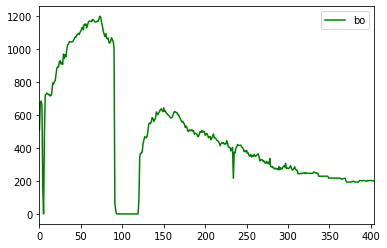

In [60]:
query = """
    select w.well, p.date, p.bo
    from production p
    join wells w on p.well_id = w.id
    where w.well = 'CANACABARE-3'
    order by p.date
"""

prod = pd.read_sql(query,engine)
prod.head()
prod.plot(color='green')

In [28]:
prod.head()

,well,date,bo
0,CANACABARE-3,2019-08-21,633.395148
1,CANACABARE-3,2019-08-22,637.331037
2,CANACABARE-3,2019-08-23,626.456200
3,CANACABARE-3,2019-08-24,620.102108
4,CANACABARE-3,2019-08-25,643.574760


In [29]:
c3 = dc.declination()

In [52]:
c3.fit(prod,time='date',rate='bo', ad=True)

[6.48524632e+02 2.19088828e+00 2.67691532e-01]


In [53]:
f,np=c3.forecast(end_date=date(2020,5,1))
f

,rate,cum
time,,
2019-08-31,611.03,611.03
2019-09-30,513.89,16027.64
2019-10-31,433.17,29455.94
2019-11-30,369.78,40549.23
2019-12-31,316.13,50349.13
2020-01-31,271.97,58780.23
2020-02-29,237.52,65668.22
2020-03-31,206.58,72072.11
2020-04-30,181.34,77512.46


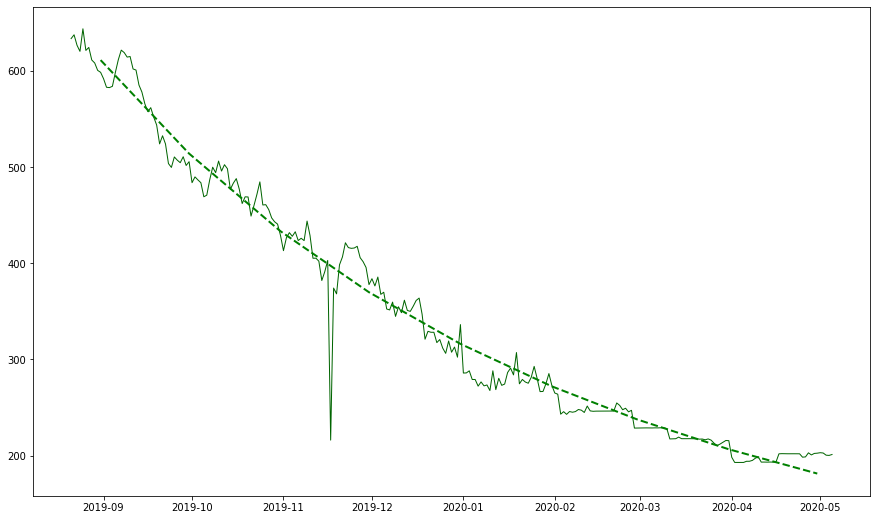

In [54]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(prod['date'], prod['bo'], linewidth = 1, color='darkgreen')
ax.plot(f.index, f['rate'], linewidth = 2, linestyle='--', color='green')


In [55]:
c3

Hyperbolic Declination 
 Ti: 2019-08-21 
 Qi: 648.5246322834014 bbl/d 
 Rate: 2.1908882754055856 Annually 
 b: 0.2676915318755088